In [8]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [10]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [11]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


variable
gender         70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
Name: count, dtype: int64
Index(['variable', 'value'], dtype='object')
       variable  value  count
0        active      0  13739
1        active      1  56261
2          alco      0  66236
3          alco      1   3764
4        cardio      0  35021
5        cardio      1  34979
6   cholesterol      1  52385
7   cholesterol      2   9549
8   cholesterol      3   8066
9        gender      1  45530
10       gender      2  24470
11         gluc      1  59479
12         gluc      2   5190
13         gluc      3   5331
14        smoke      0  63831
15        smoke      1   6169


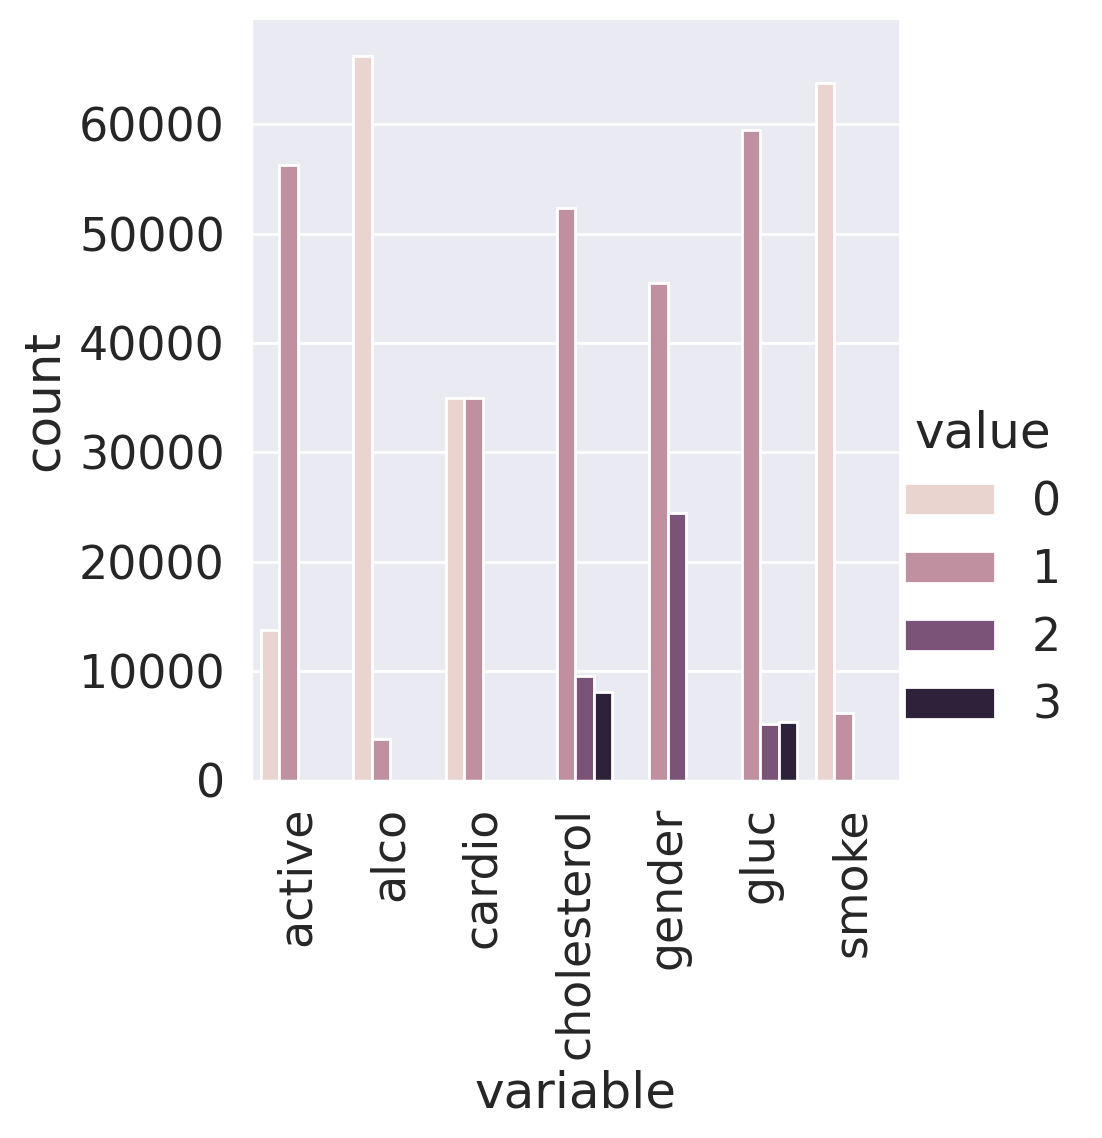

In [20]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)

print(df_uniques['variable'].value_counts())
print (df_uniques.columns)

df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

print(df_uniques)
sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

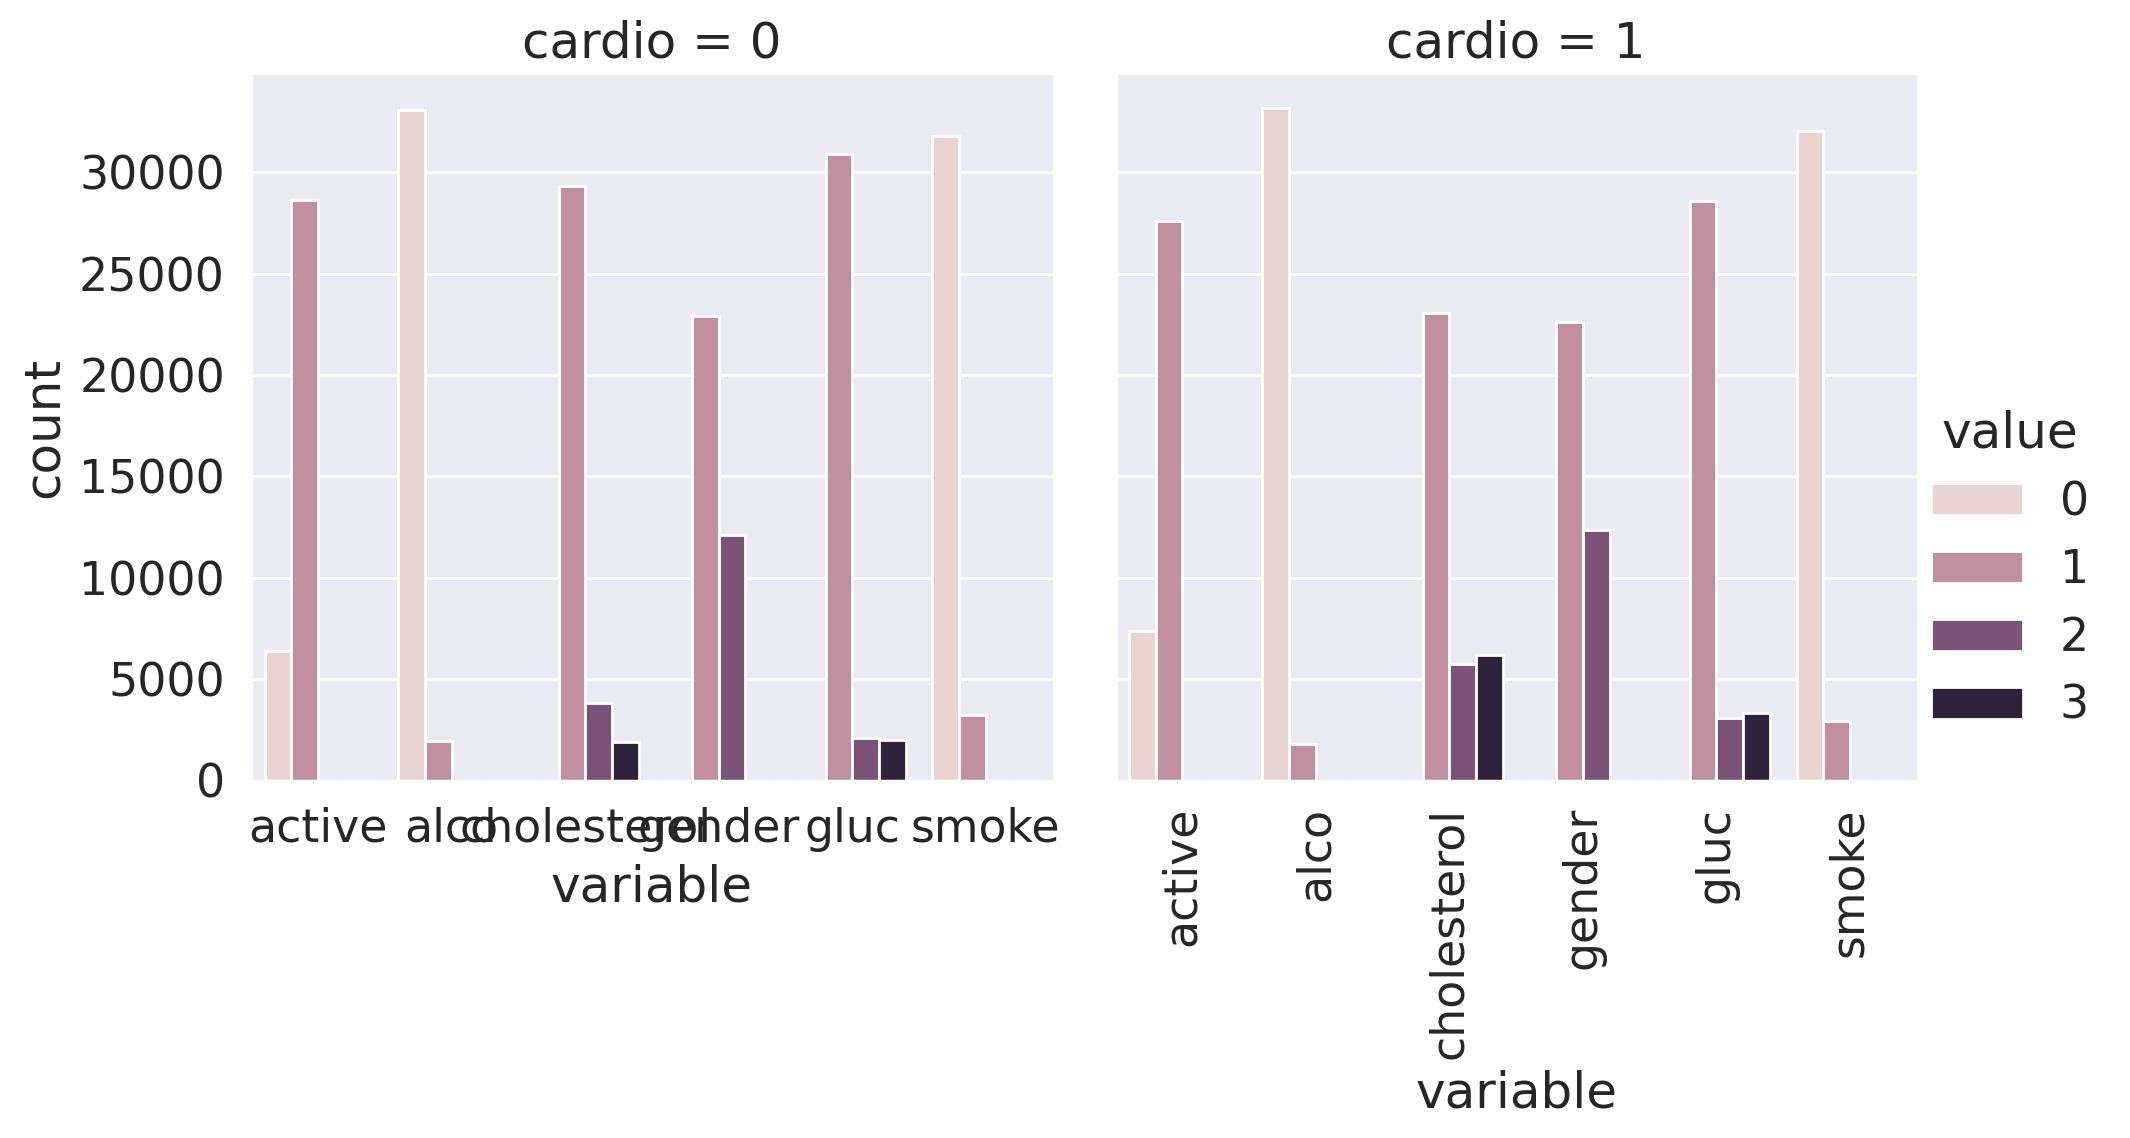

In [22]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
)
plt.xticks(rotation='vertical');

In [21]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [23]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [25]:
df.groupby('gender').agg({'height': 'mean'})

KeyError: "Column(s) ['count'] do not exist"

In [26]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

In [28]:
# aggregate gender and compute alcohol consumption
df.groupby('gender').agg({'alco': 'mean'})

,alco
gender,
1,0.025500
2,0.106375


In [29]:
# What’s the rounded difference between the percentages of smokers among men and women?
df.groupby('gender')['smoke'].mean()

gender
1    0.017856
2    0.218880
Name: smoke, dtype: float64

In [31]:
df.groupby('gender').agg({'smoke': 'mean'})

,smoke
gender,
1,0.017856
2,0.218880


In [32]:
# What’s the rounded difference between median values of age (in months) for non-smokers and smokers? You’ll need to figure out the units of feature age in this dataset.

df.groupby('smoke').agg({'age': 'median'})

,age
smoke,
0,19722.0
1,19125.0


# 1.2 (Risk map)


In [34]:
def from_days_to_years(days):
    return days / 365.25

people_60to64 = df[(from_days_to_years(df['age']) >= 60) & (from_days_to_years(df['age']) < 65)]
people_60to64

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
10,15,22530,1,169,80.0,120,80,1,1,0,0,1,0
22,32,23046,1,158,90.0,145,85,2,2,0,0,1,1
23,33,23376,2,156,45.0,110,60,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69973,99961,22142,2,175,72.0,130,80,1,1,0,0,1,0
69979,99969,22423,1,163,74.0,160,100,2,2,0,0,1,1
69988,99981,21978,1,160,59.0,110,70,1,1,0,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1


In [38]:
people_60to64.cardio.value_counts()

cardio
1    8565
0    4215
Name: count, dtype: int64

In [39]:
def filter(df, age_range, ap_hi, cholesterol_range):
    return df[
        (from_days_to_years(df['age']) >= age_range[0]) &
        (from_days_to_years(df['age']) < age_range[1]) &
        (df['ap_hi'] >= ap_hi[0]) &
        (df['ap_hi'] < ap_hi[1]) &
        (df['cholesterol'].isin(cholesterol_range))
    ]

0.8504435994930292

In [40]:
filter(df, [60, 65], [0, 120], [1]).cardio.mean()

0.41554702495201534

In [41]:
filter(df, [60, 65], [160, 179], [3, 3]).cardio.mean()

0.868995633187773

In [43]:
0.868995633187773 / 0.41554702495201534

2.0912088909507145

# 1.3 Analyzing BMI

In [46]:
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

In [47]:
df['bmi'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: bmi, dtype: float64

In [48]:
df.groupby('gender').agg({'bmi': 'mean'})

,bmi
gender,
1,27.987583
2,26.754442


In [49]:
df.groupby('cardio').agg({'bmi': 'mean'})

,bmi
cardio,
0,26.548175
1,28.566061


In [57]:
healthy_and_non_drinking_man = df[((df['gender'] == 2) & df['cardio'] == 0) & (df['alco'] == 0)]
healthy_and_non_drinking_woman = df[((df['gender'] == 1) & df['cardio'] == 0) & (df['alco'] == 0)]

healthy_and_non_drinking_man.bmi.median()

27.538266802666165

In [59]:
healthy_and_non_drinking_woman.bmi.median()

25.762980578676178

# 1.4. Cleaning data

In [60]:
def filter_data(df):
    # Filter out the following patient segments (we consider these as erroneous data)
    # diastolic pressure is higher than systolic
    # height is strictly less than 2.5 percentile (Use `pd.Series.quantile()`)
    # height is strictly more than 97.5 percentile
    # weight is strictly less than 2.5 percentile
    # weight is strictly more than 97.5 percentile

    return df[
        (df['ap_lo'] <= df['ap_hi'])
        & (df['height'].quantile(0.025) <= df['height'])
        & (df['height'] <= df['height'].quantile(0.975))
        & (df['weight'].quantile(0.025) <= df['weight'])
        & (df['weight'] <= df['weight'].quantile(0.975))
    ]

filter_data(df)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,23.661439
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [62]:
# percent of data lost
filter_data(df).shape[0] / df.shape[0]

0.9037

# Part 2. Visual data analysis

In [73]:
# use filtered dataset
df = filter_data(df)

<Axes: >

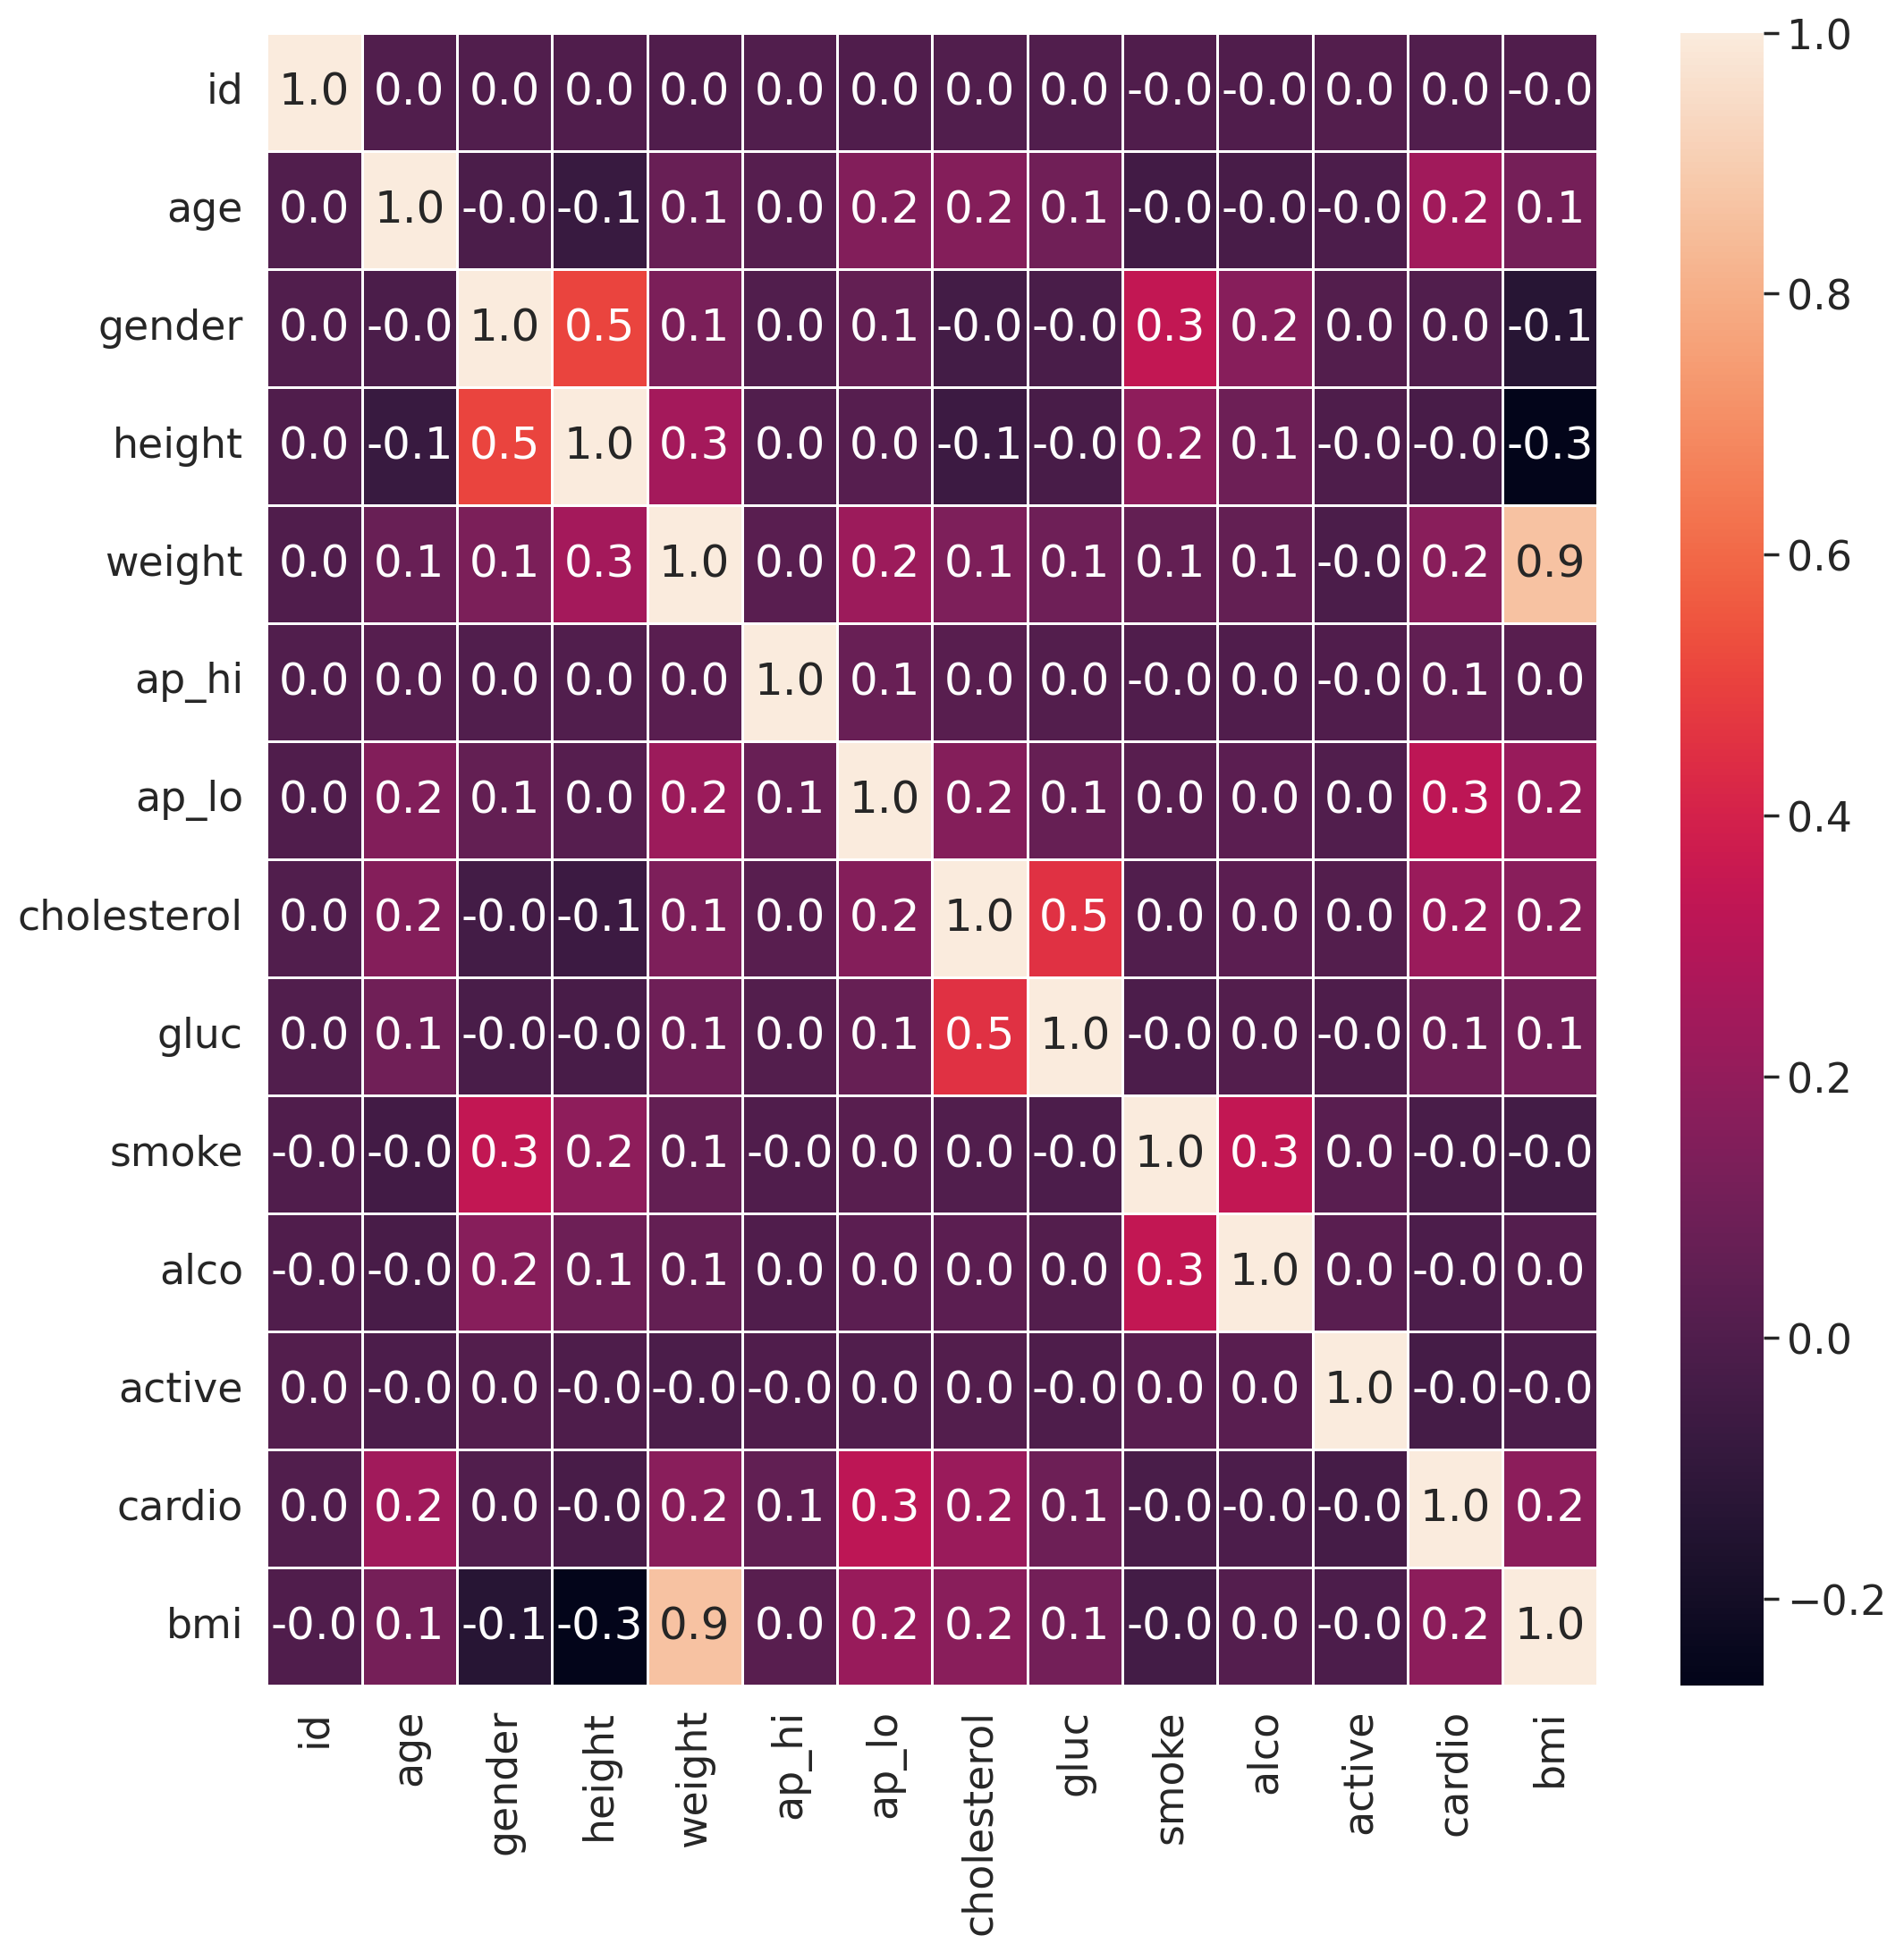

In [80]:
interested_columns = ['height', 'weight', 'smoke', 'alco', 'cholesterol']
# corr_matrix = df[df['gender'] == 2][interested_columns].corr()
# print pearson correlation

corr_matrix = df.corr('pearson')

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=0.5, ax=ax)

In [70]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [67]:
# Question 2.1. (1 point). Which pair of features has the strongest Pearson’s correlation with the gender feature?

# Cardio, Cholesterol

# Height, Smoke

# Smoke, Alco

# Height, Weight

 